# Chapter 1

## Estimates of Location

數據的變量可能有上千萬種值，透過計算數據的量值，了解數據的分散或集中的位置狀況
####  常用衡量項值
- Mean(平均數)
- Weighted Mean(權值平均數)
- Median(中位數)
- Weighted Median(權值中位數)
- Trimmed Mean(裁剪平均值)

### 資料集
使用美國的各州犯罪率的資料集進行練習，資料集中欄位包含了
- State(州名)
- Population(各州人口數)
- Murder.Rate(各州犯罪率)
- Abbreviation(州名縮寫)

### 引入所需套件
#### 套件簡介:
- <b>numpy</b>: NumPy支援高階大量的維度陣列與矩陣運算，針對陣列運算提供大量的數學函式函式庫，主要運用格式為array
- <b>pandas</b>: Pandas主要多用於數據的操作及分析，對於需大量操作數據及分析數據提供方便的function，主要運用格式為Series及DataFrame
- <b>matplotlib</b>: Matplotlib是Python程式語言的可視化工具，設計類似Matlab

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 觀察資料
pandas.read_csv()，用來讀取csv檔

In [2]:
state = pd.read_csv('state.csv')
state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


### Mean of Population
計算各州人口平均數
> Seires/DataFrame .mean()可直接計算Series/DataFrame的平均值

In [3]:
print("Mean of Population:", state['Population'].mean())

Mean of Population: 6162876.3


### Mean of Trim
資料也許有許多離異資料，過於散布於整體資料中，因此我們使用Trimmed Mean，而**Pandas並未提供trim參數，因此我們先將資料數值排序，並去掉頭尾某部分進行平均即可得到Trimmed Mean**，Trimmed Mean能使平均數算出來不容易被離異值影響

我們將Trim範圍設定為10%，並在資料排序後將頭尾10%的資料去除後，重新計算平均數

- **排序資料**
> 先取"Population"欄位，在以數量做排序

In [4]:
sorted_state = state.sort_values(by=['Population'])

- **head()觀察前幾筆資料**
> Series/DataFrame .head() 回傳前N筆資料(Default=5)

In [5]:
sorted_state.head()

,State,Population,Murder.Rate,Abbreviation
49,Wyoming,563626,2.7,WY
44,Vermont,625741,1.6,VT
33,North Dakota,672591,3.0,ND
1,Alaska,710231,5.6,AK
40,South Dakota,814180,2.3,SD


- **tail()觀察後幾筆資料**
> Series/DataFrame .tail() 回傳前N筆資料(Default=5)

In [6]:
sorted_state.tail()

,State,Population,Murder.Rate,Abbreviation
12,Illinois,12830632,5.3,IL
8,Florida,18801310,5.8,FL
31,New York,19378102,3.1,NY
42,Texas,25145561,4.4,TX
4,California,37253956,4.4,CA


- **確定排序完成後我們取10%~90%之間的資料做平均數，用以計算Trimmed Mean**

> len()：取得物件的數量(長度)<br>
Python除法運算：/為保留小數之除法運算，//為整數無條件捨去除法運算<br>
Python list取值方法: 在list後加上一個[:]，預設為0~最後一個，
```
如list[0]為取第一個值，list[3]為第四個值，list[-1]則為最後一個值(倒數的概念，0的前一個會跳到最後一個)，list[-2]則為倒數第二個；
list[0:2]為前兩個數值，型態仍為list、list[1:2]為第二個數值，但此時型態為list，其中不可使用如[2:1]、[0:-1]等，取出來並不是反向
```

In [7]:
# 取全部資料的長度的10%
part = len(sorted_state)//10
print("10% trim mean：",sorted_state['Population'][part:-part].mean())

10% trim mean： 4783697.125


接著先來看中位數狀況

### Median of Population
中位數是資料排序後位於中心的值，資料中有部分離異值時參考價值會提高
> Series/DataFrame .median()回傳資料的中位數

In [8]:
print("Median of Population:", state['Population'].median())

Median of Population: 4436369.5


人口的平均在做修剪(Trim)之前，與中位數相差甚遠(Mean:6162876、Median:4436369)，可以看出資料是沒有平均分散或者有部分離異值的。<br>
Trimmed Mean & Median相近(4,783,697 & 4,436,369)，此時Trimmed Mean參考價值會比Mean高。

### 接下來進行"犯罪率(Murder Rate)"的數據描述分析

### Mean of Murder.Rate
計算各州的犯罪率平均

In [9]:
print("Mean of Murder Rate:", state['Murder.Rate'].mean())

Mean of Murder Rate: 4.066


在人口分布不均的情況下，直接計算平均數去觀看資料是有失公平的，應加上各州的人口的權重進行平均

### Weighted Mean
計算權值平均數<br>
公式: $ \sum(Xi*wi) / \sum(X) $

> Pandas中將兩個Series相乘，可以得到其相乘的結果，如:$ [1, 5, 3] * [5, 4, 3] = [5, 20, 9] $

In [10]:
print("Weighted Mean of Murder Rate:", (state['Population'] * state['Murder.Rate']).sum() / state['Population'].sum())

Weighted Mean of Murder Rate: 4.445833981123393


### Weighted Median
計算權值中位數

In [11]:
weighted_state = state.sort_values(by='Murder.Rate')

# 把人口數變成人口比例 (%)
weighted_state['Population'] = weighted_state['Population'] / weighted_state['Population'].sum()

weighted_state.head(10)

,State,Population,Murder.Rate,Abbreviation
28,New Hampshire,0.004272,0.9,NH
22,Minnesota,0.017212,1.6,MN
18,Maine,0.004311,1.6,ME
44,Vermont,0.002031,1.6,VT
10,Hawaii,0.004415,1.8,HI
14,Iowa,0.009886,1.9,IA
36,Oregon,0.012433,2.0,OR
20,Massachusetts,0.021249,2.0,MA
11,Idaho,0.005087,2.0,ID
43,Utah,0.008969,2.3,UT


In [12]:
# 把人口比例做 cumsum(累加) 加進新的欄位 Weight_Population
weighted_state['Weight_Population'] = weighted_state['Population'].cumsum()
weighted_state.head(10)

,State,Population,Murder.Rate,Abbreviation,Weight_Population
28,New Hampshire,0.004272,0.9,NH,0.004272
22,Minnesota,0.017212,1.6,MN,0.021485
18,Maine,0.004311,1.6,ME,0.025796
44,Vermont,0.002031,1.6,VT,0.027826
10,Hawaii,0.004415,1.8,HI,0.032241
14,Iowa,0.009886,1.9,IA,0.042127
36,Oregon,0.012433,2.0,OR,0.054560
20,Massachusetts,0.021249,2.0,MA,0.075808
11,Idaho,0.005087,2.0,ID,0.080895
43,Utah,0.008969,2.3,UT,0.089865


In [13]:
# 取出 Weight_Population 第一個 <= 0.5 的位置，也就是累加後的最後一個值
# 在取得該位置的 Murder.Rate，就是權值中位數了
print("Weighted Median:", weighted_state[weighted_state['Weight_Population']<=0.5]['Murder.Rate'].values[-1])

Weighted Median: 4.4


加上人口作為權值進行平均數及中位數計算後，可以看出權值後的中位數與平均數接近，能較不受離異值所影響

## Estimates of Variability

數據的分散或集中的位置狀況只是概括功能的一個維度，我們需要其他指標來衡量數據的分散程度或者是集中程度，稱為Variability。

#### 常用的衡量指標
- Deviation
- Variance
- Standard Deviation
- Mean Absolute Deviation
- Median Absolute Deviation from the median
- Interquantile Range

### Deviation
偏差是資料與位置估測指標(上一部分的任一種值)的差，即$ X_{i} - point ，X_{i}為資料(X_{1},X_{2},...,X_{n})、point為衡量指標(如Mean)$

### Variance & Standard Deviation
最知名的變量估測的方法就是Variance(變異數)，及Standard Deviation(標準差)，其二皆建立在平方偏差，<br>
Variance是平方偏差的平均，Standard Deviation則是Variance的平方根
> .var()回傳Series/DataFrame的變異數之值<br>
.std()回傳Series/DataFrame的標準差之值<br>

In [14]:
print("Variance:",state['Population'].var())

Variance: 46898327373394.445


In [15]:
print("Standard Deviation:", state['Population'].std())

Standard Deviation: 6848235.347401142


### 驗算
> abs(obj)將obj皆取絕對值

In [16]:
# 方便後續寫程式方便，將人口數資料寫入變數
population = state['Population']

total = 0  # 總和暫存變數
for p in population:
    total += p
pop_mean = total / len(population)
print('Mean of Population:', pop_mean)

var_total = 0
for p in population:
    var_total += abs(p - pop_mean)**2
var = var_total / (len(population) - 1)
print('Variance: ', var)
print('Standard Deviation: ', var ** 0.5)

Mean of Population: 6162876.3
Variance:  46898327373394.445
Standard Deviation:  6848235.347401142


要觀測資料的分散性，常用的一個測量方法稱為range，即是最大值與最小值的差，而如果直接將數據的最大、最小值直接算差出來是很敏感的，容易受離異值影響，因此去除前後部分資料，再進行計算可以改善因離異值的數據敏感

### IQR(Interquantile Range)

$ IQR = 75th Percentile - 25th Percentile $

IQR(四分位距)也是其中一種資料中各變量估測情形指標，畫出箱型圖可以更明顯的觀察數據的分布(下一部分會介紹)

使用Pandas內建function取出25th百分位數及75百分位數
> .quantile()給定所需取得的百分位數(**Ex.**:quantile(0.25)=25th百分位數、quantile([.25, .5])=25th百分位數&50th百分位數)

In [17]:
quantiles = state['Population'].quantile([0.25, 0.75])
print("IQR:", quantiles[0.75] - quantiles[0.25])

IQR: 4847308.0


### Mean Absolute Deviation & Median Absolute Deviation
另一種變量估測的方法為Mean Absolute Deviation，將與平均的差做平均，<br>
而如果資料過於偏離，使用中位數Median Absolute Deviation也許較佳，能夠較不被離異值所影響。
> 因Pandas只提供Mean Absolute Deviation(MAD)，並未提供Median Absolute Deviation計算的function，故使用公式自行計算<br>
- .mad()回傳Mean Absolute Deviation的值

#### MAD(Mean)

In [18]:
print("Mean Absolute Deviation:", state['Population'].mad())

Mean Absolute Deviation: 4450933.356000001


#### MAD(Median)

In [19]:
print("Median Absolute Deviantion:", abs(state['Population']- state['Population'].median()).median())  ## should be 3849870

Median Absolute Deviantion: 2596702.0


## Exploring the Data Distribution

透過視覺呈現，更能值觀的觀看數據整體分佈，以下介紹四種統計圖
- Boxplot
- Frequency table
- Histogram
- Density plot

### Boxplot(箱型圖)

製作箱型圖所需數值 Q1-(1.5 * IQR), Q1, Median, Q3, Q3+(1.5 * IQR)

In [20]:
quantiles = state['Population'].quantile([0.0, 0.25, 0.5 ,0.75])

Q1 = quantiles[0.25]
Q3 = quantiles[0.75]
IQR = quantiles[0.75] - quantiles[0.25]
print(IQR)
print(Q1)
median = quantiles[0.5]



print("Boxplot 參數分別為：", Q1-(1.5*IQR),Q1,median,Q3,Q3+(1.5*IQR))
print("由於最下邊界低於最小值，所以就用最小值當作最低邊界")
print("Boxplot 參數分別為：", quantiles[0.0],Q1,median,Q3,Q3+(1.5*IQR))

4847308.0
1833004.25
Boxplot 參數分別為： -5437957.75 1833004.25 4436369.5 6680312.25 13951274.25
由於最下邊界低於最小值，所以就用最小值當作最低邊界
Boxplot 參數分別為： 563626.0 1833004.25 4436369.5 6680312.25 13951274.25


#### Boxplot
> pyplot.figure() 設定新圖像<br>
pyplot.ylabel() 設定y軸標註名稱<br>
pyplot.boxplot(array) 依給予array資料畫出箱型圖

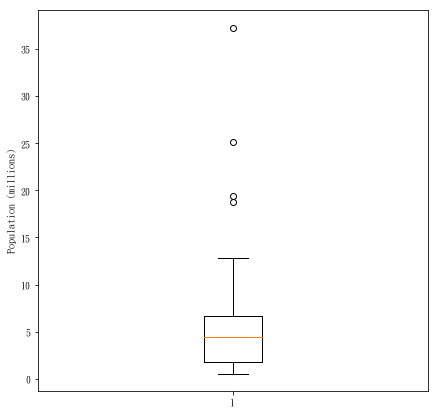

In [21]:
plt.figure(figsize=(7,7))
plt.ylabel("Population (millions)")
plt.boxplot(state['Population']/1000000)
plt.show()

### Frequency Table
製作區間的頻率表，觀測資料的分布狀況

> 製作DataFrame: pandas.DataFrame(array) 依據給予array產生dataframe，若給予的是dict，欄位會依照dict之key設定為column<br>

> arange(start, end, offset)可產生start~end範圍的所有數值，間隔offset，default: start=0, offset=1, 需給定end<br>
而np.arange用法相同，但回傳回類型為numpy.array

#### 製作Frequency Table - 產生數值區間

In [22]:
# 製作分成10個區間的資料
smax = max(state['Population'])
smin = min(state['Population'])
ofst = (smax - smin)/10  #計算每個區間的範圍

min_range = np.arange(smin, smax, ofst)
max_range = np.arange(smin + ofst, smax + ofst, ofst)

frq_table = pd.DataFrame({"from": min_range, "to": max_range})
frq_table

,from,to
0,563626.0,4232659.0
1,4232659.0,7901692.0
2,7901692.0,11570725.0
3,11570725.0,15239758.0
4,15239758.0,18908791.0
5,18908791.0,22577824.0
6,22577824.0,26246857.0
7,26246857.0,29915890.0
8,29915890.0,33584923.0
9,33584923.0,37253956.0


#### 製作Frequency Table -  計算區間頻率並加入表

在dataframe取值時，可以選定數值範圍，如範例中
```
state['Population'][(state['Population'] >= br1) & (state['Population'] <= br2)]
```
第一個[]先取得需要的欄位，第二個[]內使用判斷式設定選取範圍(取得人口數>=br1 and 人口數<=br2)

In [23]:
count = []
for br1, br2 in zip(frq_table['from'], frq_table['to']):  # zip同時取'from'&'to'兩個欄位的值
    # list.append用於新增element至list
    # 設定取值範圍
    select_range = (state['Population'] >= br1) & (state['Population'] <= br2)
    # 取值後取得過濾後的資料數量
    interval = len(state['Population'][select_range])
    # 加入到list
    count.append(interval)
# 加入到表
frq_table['count'] = count
frq_table

,from,to,count
0,563626.0,4232659.0,24
1,4232659.0,7901692.0,14
2,7901692.0,11570725.0,6
3,11570725.0,15239758.0,2
4,15239758.0,18908791.0,1
5,18908791.0,22577824.0,1
6,22577824.0,26246857.0,1
7,26246857.0,29915890.0,0
8,29915890.0,33584923.0,0
9,33584923.0,37253956.0,1


### Histogram(直方圖)

為了視覺畫上述的表，利用 matplotlib 可以產生直方圖

帶入原本 state 中的 Population 即可 (這裡的單位以 人/百萬 為單位) 

bins 設定就以上述所產生的區間數量為準

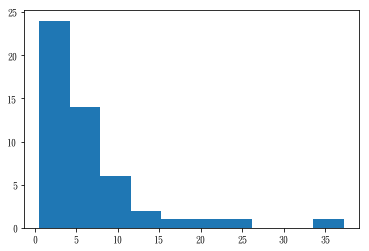

In [24]:
plt.figure()
plt.hist(state['Population']/1000000, bins=10)  # bins參數用於設定會有幾個長條
plt.show()

### Density plot(密度曲線圖)

Density plot 是以一個平滑的曲線來表達資料的分布

可以視為較平滑的直方圖

這裡的範例我們用 seaborn 來完成

seaborn 就是 matplotlib 的更高級封裝

裏頭多了很多制定好的方法

先繪製直方圖

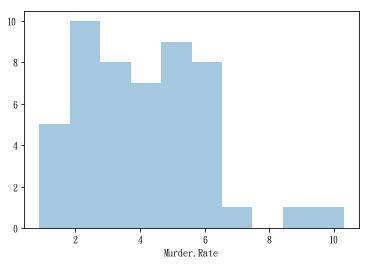

In [42]:
import seaborn as sns

sns.distplot(state['Murder.Rate'], bins=10, kde=False)
plt.show()

在 distplot 的參數後加上 kde=True

所得的曲線就是其機率密度

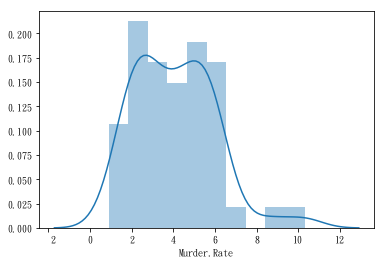

In [45]:
sns.distplot(state['Murder.Rate'], bins=10, kde=True)
plt.show()